In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from openfast_toolbox.io import TurbSimFile

In [ ]:
# single file test before running the whole batch

filename = os.path.join('../preRamp/15mw-typhoon-TEWM50_Seed1.bts')
tsMod2 = TurbSimFile(filename)
print(tsMod2)

time4Ramp = 400.0 # seconds
dt = tsMod2['dt']
nRamp = int(time4Ramp / dt)

iy, iz = tsMod2.closestPoint(y=0, z=150)

print(nRamp)

# Compute the ramp required to get to the desired wind speed
ramp = np.linspace(3.0, tsMod2['u'][0,0,iy,iz], nRamp)


# Create a new wind field with the ramp
tempWind = np.zeros(shape=(3, nRamp, tsMod2['y'].size, tsMod2['z'].size), dtype=float)


for idx in range(ramp.size):
    tempWind[0,idx,:,:] = ramp[idx]
    tempWind[1,idx,:,:] = 0.0
    tempWind[2,idx,:,:] = 0.0

tsMod2['t'] = np.concatenate((np.linspace(0.0, time4Ramp, nRamp), tsMod2['t'] + time4Ramp), axis=0)
tsMod2['u'] = np.concatenate((tempWind, tsMod2['u']), axis=1)

# reshaping the tower wind field
tsMod2['uTwr'] = tsMod2['uTwr'].reshape(3,tsMod2['t'].size,0)

print(tsMod2)

tsMod2['ID'] = 7
# tsMod2.write('ramp_plus_turb.bts')


In [ ]:
# --- Extract a horizontal plane and plot it
U, V, W = tsMod2.horizontalPlane(z=150)
T, Y = np.meshgrid(tsMod2.t, tsMod2.y)
fig,ax = plt.subplots(1, 1)
cs = ax.contourf(T, Y, U.T)
ax.set_xlabel('Time [s]')
ax.set_ylabel('y [m]')
ax.set_title('Velocity at z=150')

plt.colorbar(cs)

<TurbSimFile object> with keys:
 - filename: ../preRamp/15mw-typhoon-TEWM50_Seed1.bts
 - ID: 8
 - z: [5.0 ... 294.9999885559082],  dz: 10.357142448425293, n: 29 
 - y: [-160.0 ... 160.0],  dy: 10.0, n: 33 
 - t: [0.0 ... 999.9500149],  dt: 0.05, n: 20000 
 - u: (3 x 20000 x 33 x 29) 
    ux: min: 21.480069022890106, max: 99.03839403679675, mean: 62.21609721720874 
    uy: min: -14.042313007494034, max: 22.671691502713017, mean: 1.1039034577029545 
    uz: min: -15.186052502698349, max: 14.429459711335447, mean: 3.074669057496817e-08 
    yMid: 0.0 - zMid: 149.9999942779541 - iy: 16 - iz: 14 - uMid: 66.40930397330908 (nearest neighbor))
 Useful methods:
 - read, write, toDataFrame, keys
 - valuesAt, vertProfile, horizontalPlane, verticalPlane, closestPoint
 - fitPowerLaw
 - makePeriodic, checkPeriodic

8000
<TurbSimFile object> with keys:
 - filename: ../preRamp/15mw-typhoon-TEWM50_Seed2.bts
 - ID: 8
 - z: [5.0 ... 294.9999885559082],  dz: 10.357142448425293, n: 29 
 - y: [-160.0 ... 16

/tmp/ipykernel_513691/1844365453.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(1, 1)


<TurbSimFile object> with keys:
 - filename: ../preRamp/15mw-typhoon-TEWM50_Seed22.bts
 - ID: 8
 - z: [5.0 ... 294.9999885559082],  dz: 10.357142448425293, n: 29 
 - y: [-160.0 ... 160.0],  dy: 10.0, n: 33 
 - t: [0.0 ... 999.9500149],  dt: 0.05, n: 20000 
 - u: (3 x 20000 x 33 x 29) 
    ux: min: 21.471211643684338, max: 92.879580490262, mean: 62.21609731843144 
    uy: min: -13.734992239172373, max: 21.76989936385683, mean: 1.103903511709406 
    uz: min: -13.80844302635024, max: 14.226225248118038, mean: -3.562611795087894e-08 
    yMid: 0.0 - zMid: 149.9999942779541 - iy: 16 - iz: 14 - uMid: 66.40930088326276 (nearest neighbor))
 Useful methods:
 - read, write, toDataFrame, keys
 - valuesAt, vertProfile, horizontalPlane, verticalPlane, closestPoint
 - fitPowerLaw
 - makePeriodic, checkPeriodic

8000
<TurbSimFile object> with keys:
 - filename: ../preRamp/15mw-typhoon-TEWM50_Seed23.bts
 - ID: 8
 - z: [5.0 ... 294.9999885559082],  dz: 10.357142448425293, n: 29 
 - y: [-160.0 ... 160.

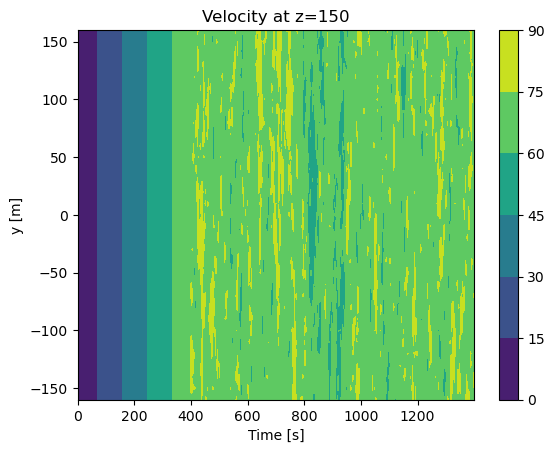

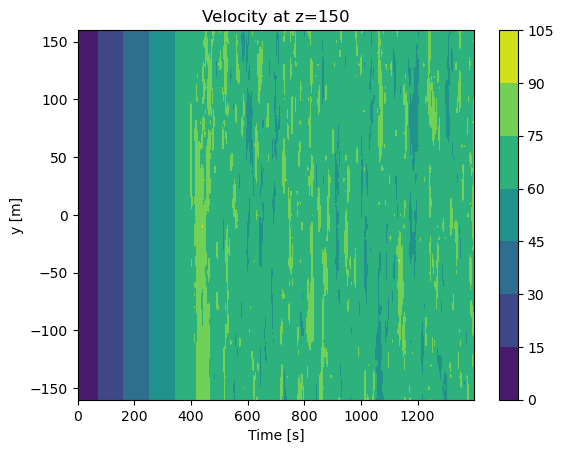

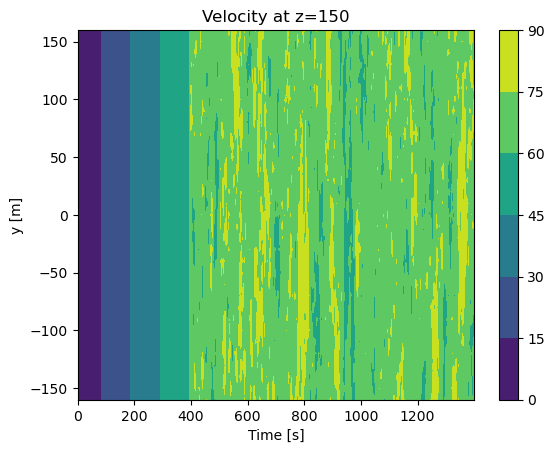

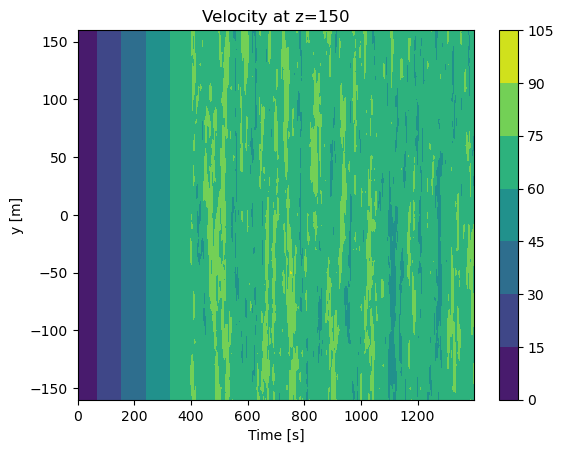

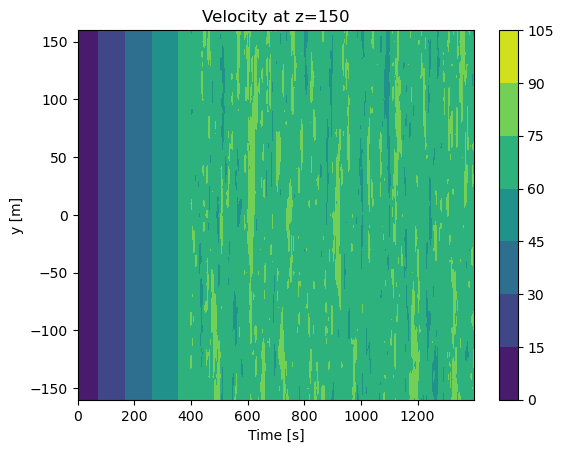

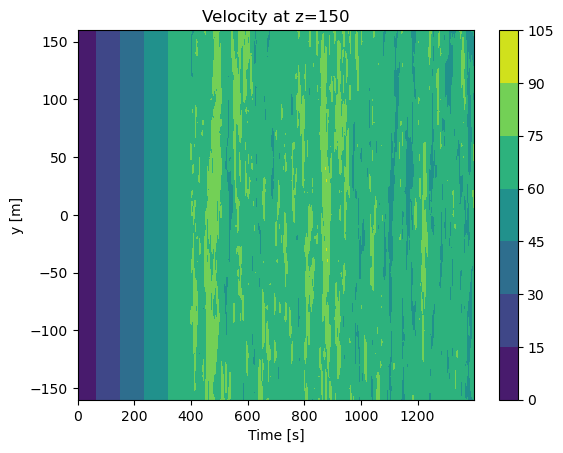

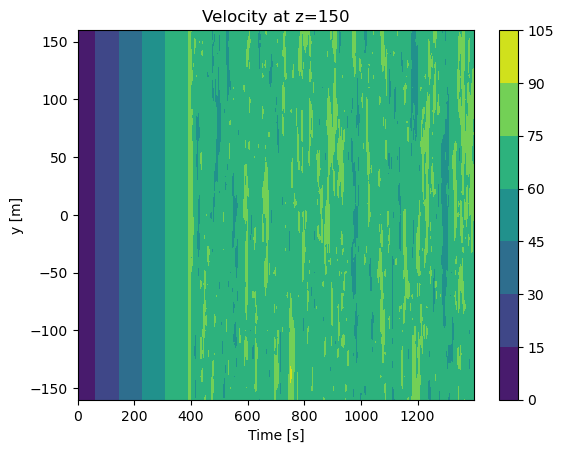

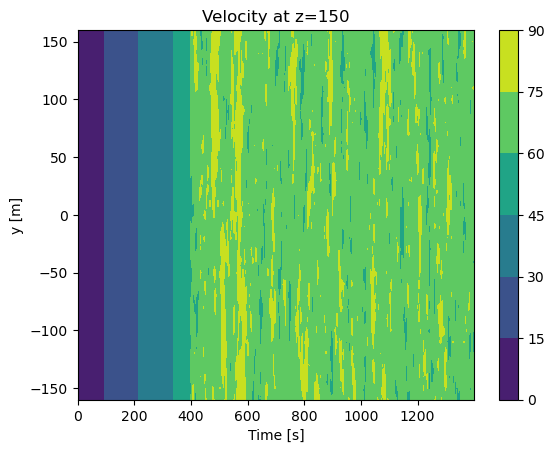

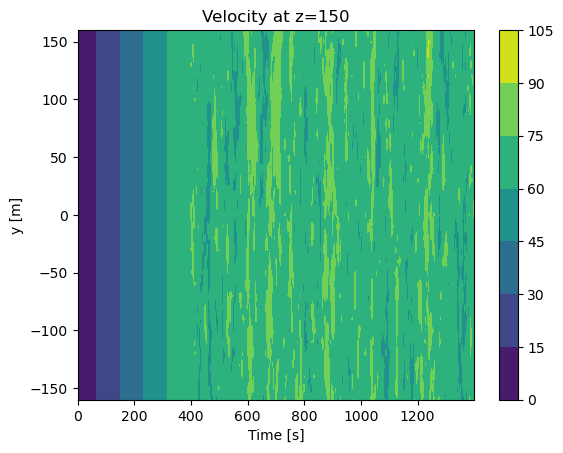

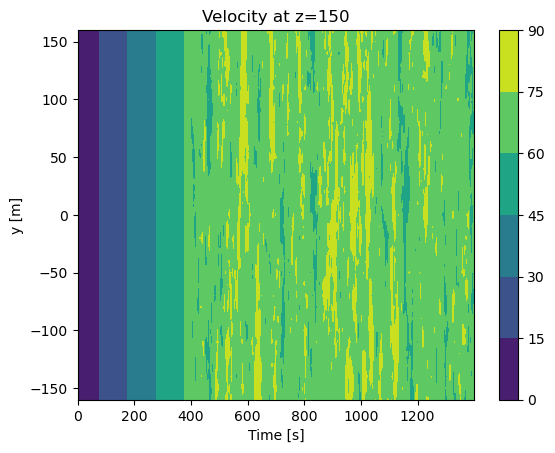

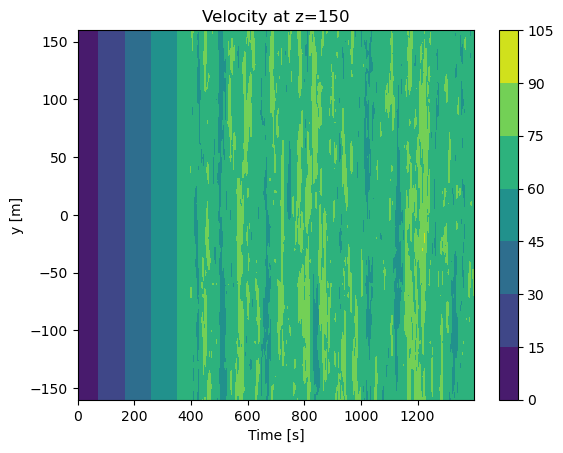

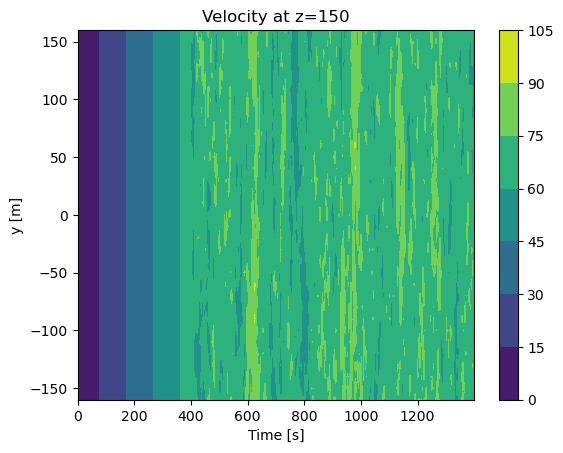

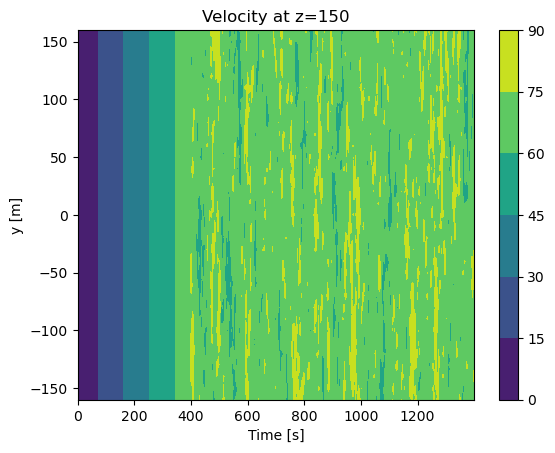

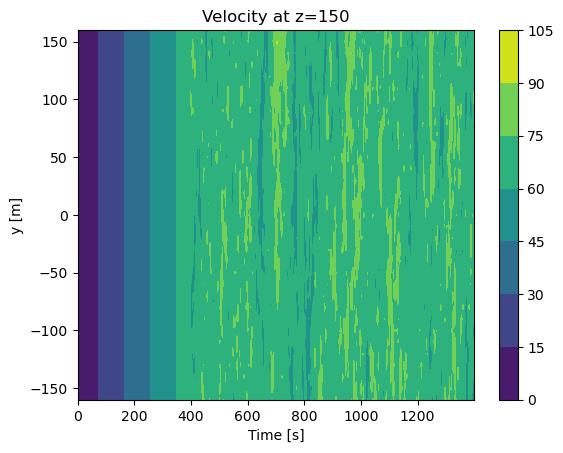

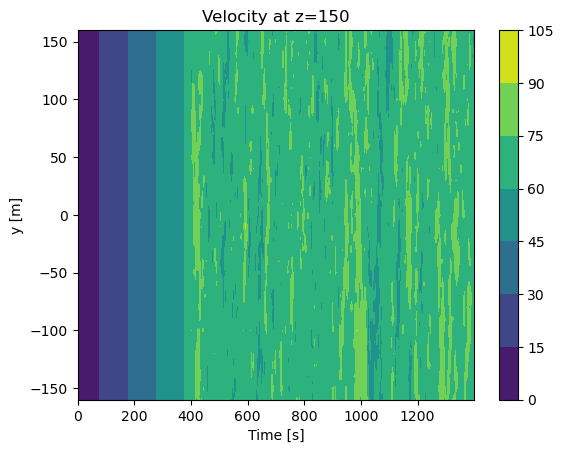

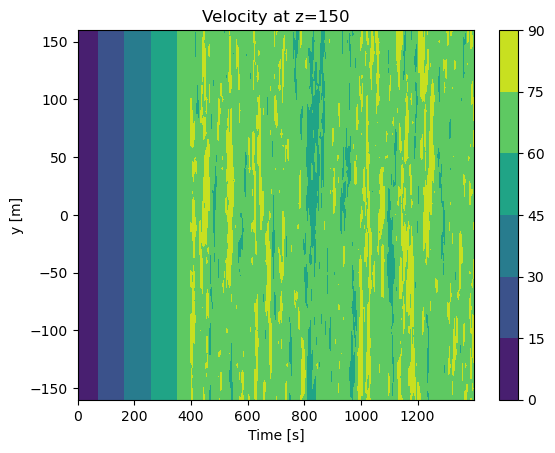

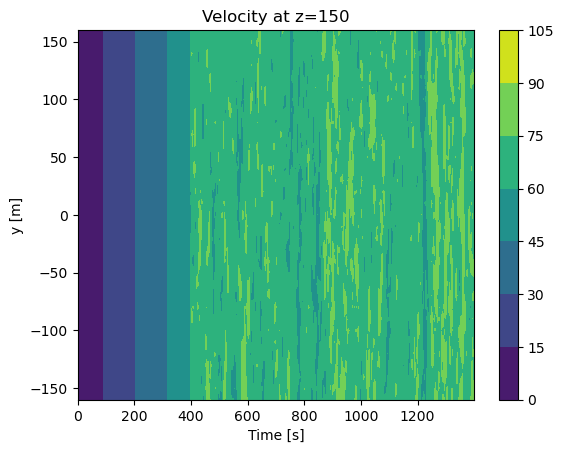

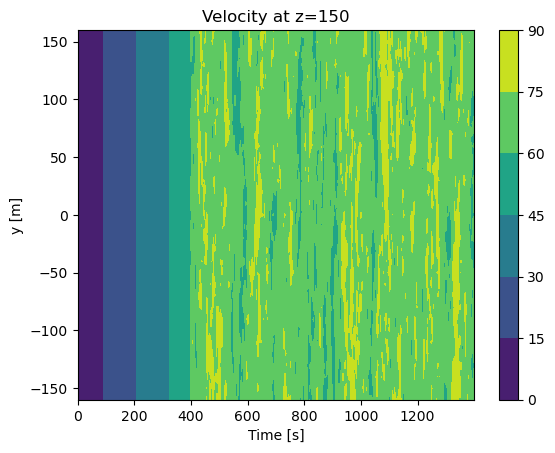

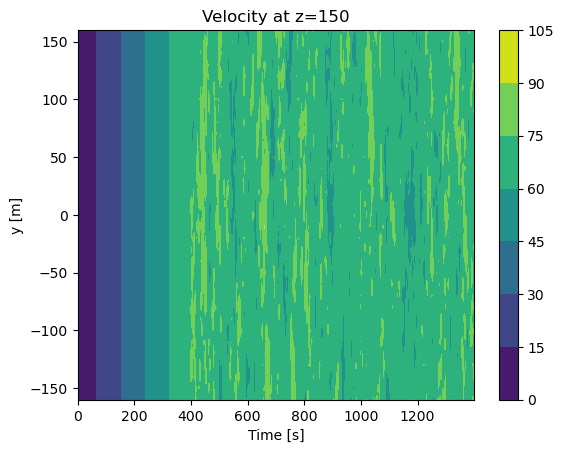

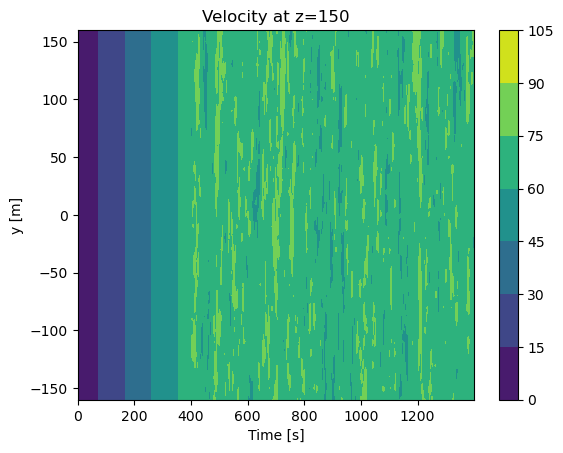

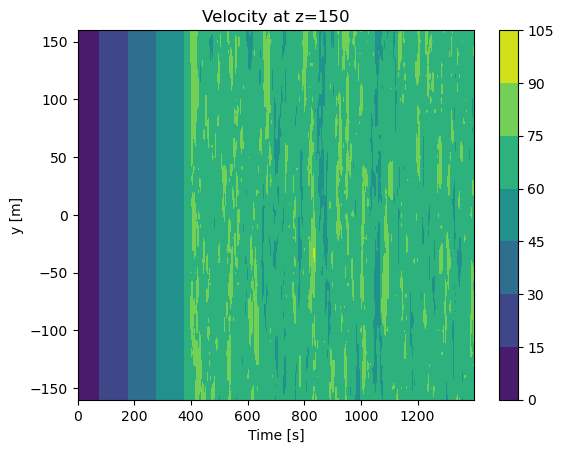

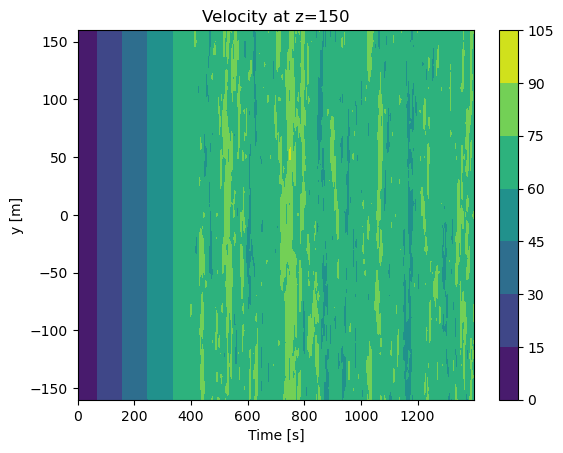

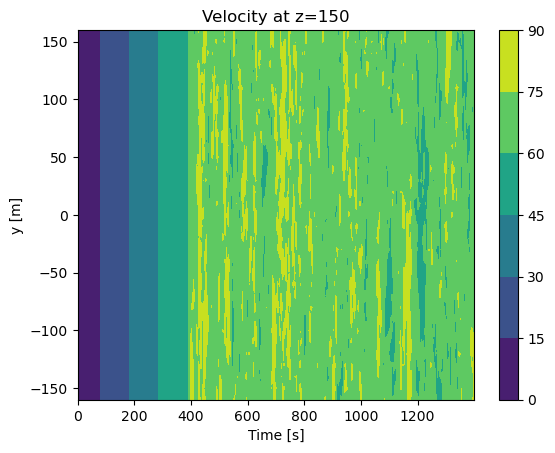

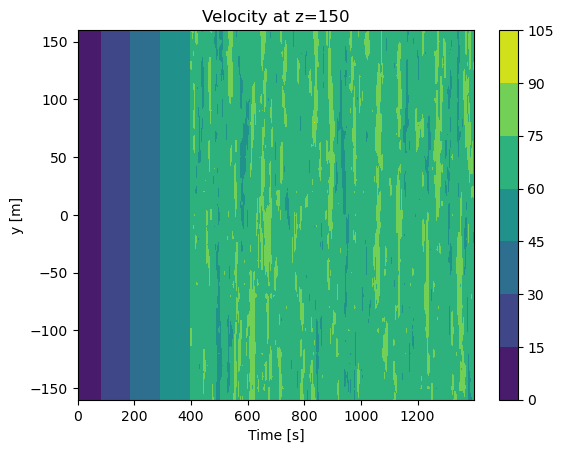

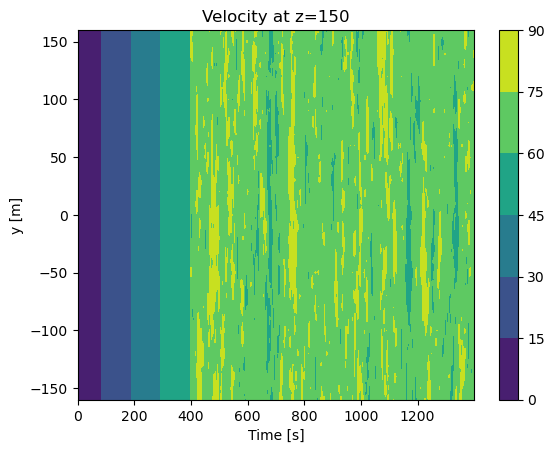

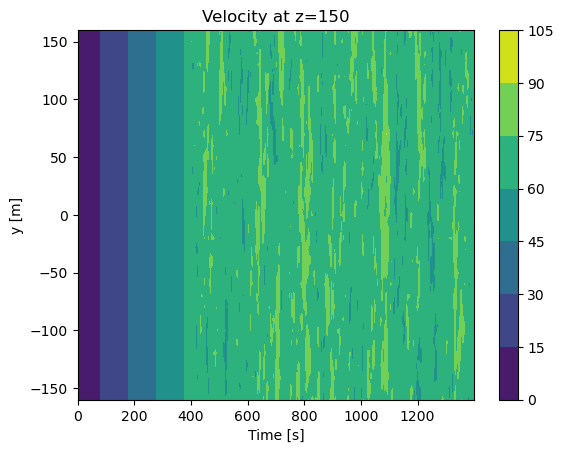

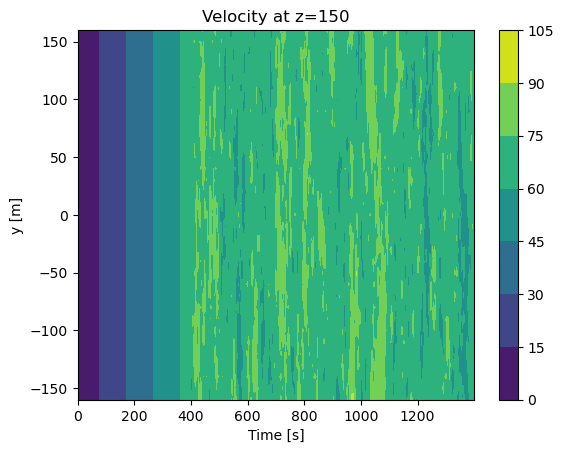

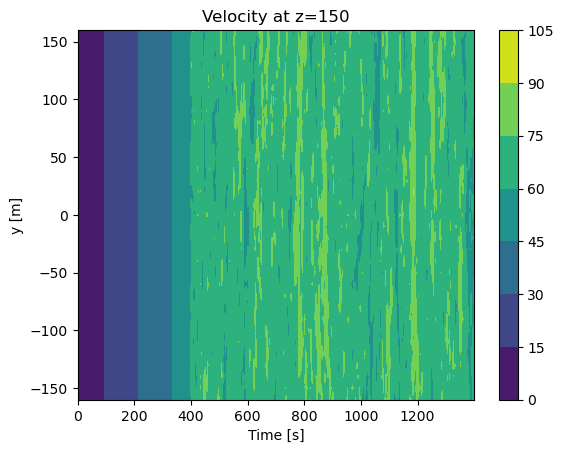

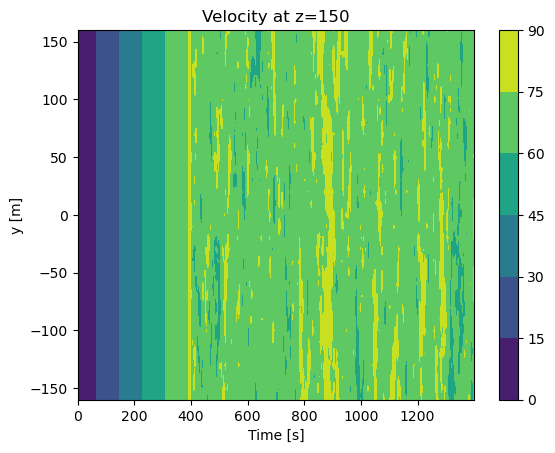

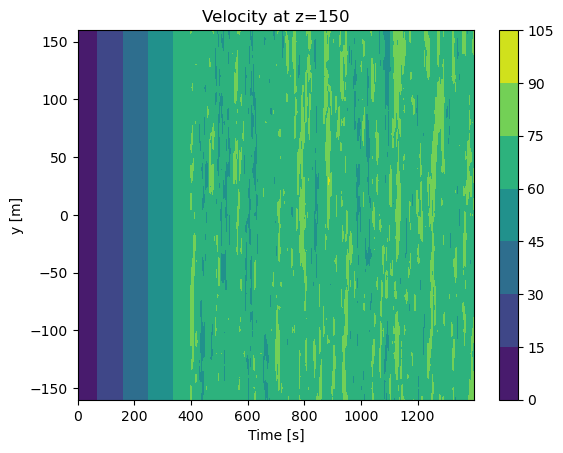

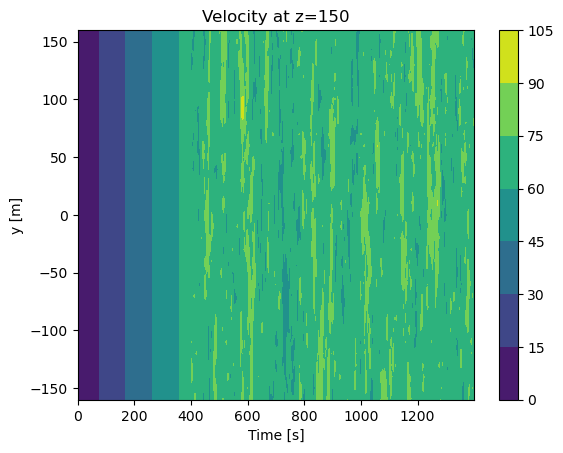

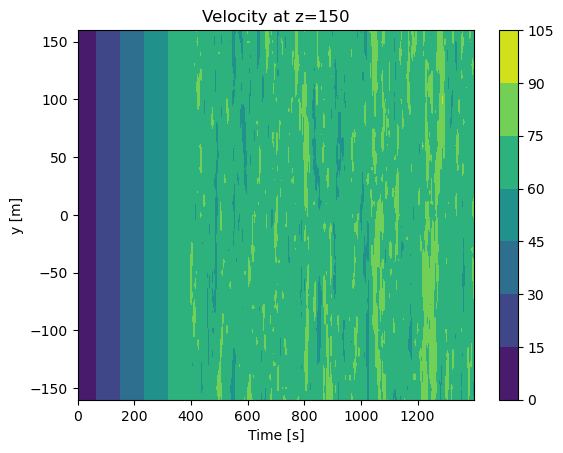

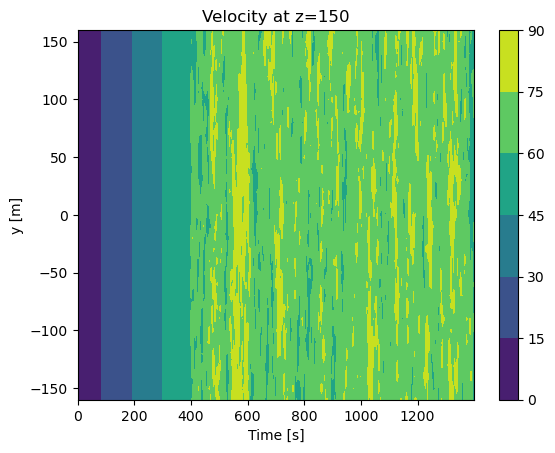

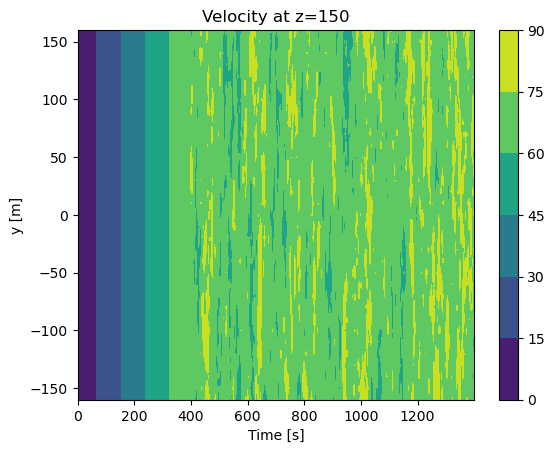

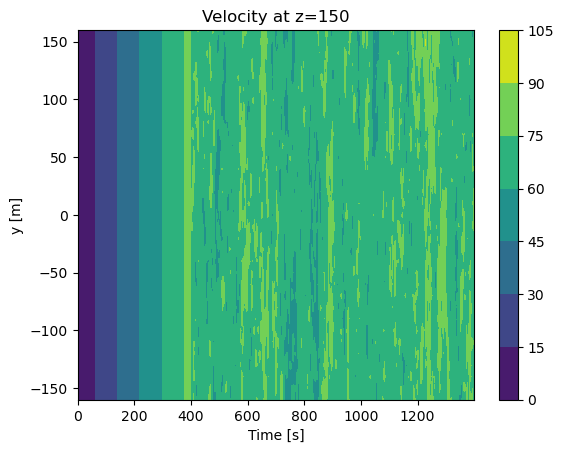

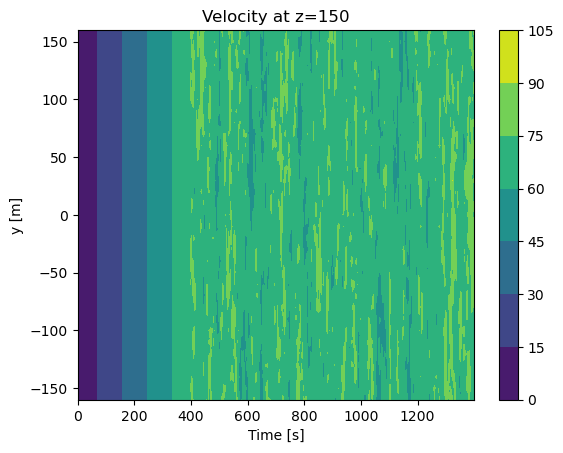

In [2]:
for id in range(36):

    filename = os.path.join('../preRamp/15mw-typhoon-TEWM50_Seed'+str(id+1)+'.bts')
    tsMod2 = TurbSimFile(filename)
    print(tsMod2)

    time4Ramp = 400.0 # seconds
    dt = tsMod2['dt']
    nRamp = int(time4Ramp / dt)

    iy, iz = tsMod2.closestPoint(y=0, z=150)

    print(nRamp)

    # Compute the ramp required to get to the desired wind speed
    ramp = np.linspace(3.0, tsMod2['u'][0,0,iy,iz], nRamp)


    # Create a new wind field with the ramp
    tempWind = np.zeros(shape=(3, nRamp, tsMod2['y'].size, tsMod2['z'].size), dtype=float)


    for idx in range(ramp.size):
        tempWind[0,idx,:,:] = ramp[idx]
        tempWind[1,idx,:,:] = 0.0
        tempWind[2,idx,:,:] = 0.0

    tsMod2['t'] = np.concatenate((np.linspace(0.0, time4Ramp, nRamp), tsMod2['t'] + time4Ramp), axis=0)
    tsMod2['u'] = np.concatenate((tempWind, tsMod2['u']), axis=1)

    # reshaping the tower wind field
    tsMod2['uTwr'] = tsMod2['uTwr'].reshape(3,tsMod2['t'].size,0)

    # print(tsMod2)

    tsMod2['ID'] = 7 # Changing to non periodic
    tsMod2.write('ramp_plus_turb_'+str(id+1)+'.bts')

    # --- Extract a horizontal plane and plot it
    U, V, W = tsMod2.horizontalPlane(z=150)
    T, Y = np.meshgrid(tsMod2.t, tsMod2.y)
    fig,ax = plt.subplots(1, 1)
    cs = ax.contourf(T, Y, U.T)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('y [m]')
    ax.set_title('Velocity at z=150')
    plt.colorbar(cs)

    plt.savefig('ramp_plus_turb_'+str(id+1)+'.png')

In [ ]:
# Method 2 - use data directly
iy, iz = ts.closestPoint(y=0, z=150)
u2,v2,w2 = ts['u'][0, :, iy, iz], ts['u'][1, :, iy, iz], ts['u'][2, :, iy, iz]

fig,ax = plt.subplots(1, 1)
# ax.plot(ts.t, u, label='u')
# ax.plot(ts.t, v, label='v')
# ax.plot(ts.t, w, label='w')
ax.plot(ts.t, u2, label='u')
ax.plot(ts.t, v2, label='v')
ax.plot(ts.t, w2, label='w')
ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
ax.set_title('Velocity at y=0 z=150')

In [ ]:
# listing the file names in order for use in the weis scripts

for idx in range(36):
    print(f"'/projects/storm/IdlingRotor/models/inflow/updated-typhoon-withRamp/ramp_plus_turb_{idx+1}.bts', ")